In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv('Port_preprocessed.csv')

In [26]:
df.head()

,Medu,Fedu,studytime,famrel,school_GP,sex_F,address_U,famsize_LE3,Pstatus_T,Mjob_health,...,guardian_father,schoolsup_no,famsup_yes,paid_no,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_no,Grade
0,1.00,1.00,0.333333,0.75,1,1,1,0,0,0,...,0,0,0,1,0,1,1,0,1,7.333333
1,0.25,0.25,0.333333,1.00,1,1,1,0,1,0,...,1,1,1,1,0,0,1,1,1,10.333333
2,0.25,0.25,0.333333,0.75,1,1,1,1,1,0,...,0,0,0,1,0,1,1,1,1,12.333333
3,1.00,0.50,0.666667,0.50,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,0,14.000000
4,0.75,0.75,0.333333,0.75,1,1,1,0,1,0,...,1,1,1,1,0,1,1,0,1,12.333333


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Medu,14.271689
1,Fedu,10.661153
2,studytime,2.633045
3,famrel,9.639370
4,school_GP,3.846590
5,sex_F,2.781735
6,address_U,3.988242
7,famsize_LE3,1.566942
8,Pstatus_T,8.205285
9,Mjob_health,1.433492


In [29]:
var_inf= pd.DataFrame(calc_vif(X))
drop_cols = var_inf.loc[var_inf['VIF']>7]['variables']
t=list(drop_cols)
df1 = df.drop(t,axis = 1)
df1.head()

,studytime,school_GP,sex_F,address_U,famsize_LE3,Mjob_health,Mjob_services,Mjob_teacher,Fjob_health,Fjob_teacher,reason_home,reason_reputation,guardian_father,famsup_yes,activities_yes,nursery_yes,internet_yes,romantic_no,Grade
0,0.333333,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,7.333333
1,0.333333,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,10.333333
2,0.333333,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,12.333333
3,0.666667,1,1,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,14.000000
4,0.333333,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,12.333333


In [30]:
t

['Medu',
 'Fedu',
 'famrel',
 'Pstatus_T',
 'schoolsup_no',
 'paid_no',
 'higher_yes']

In [31]:
#Identify input and target columns
input_cols,target_cols=df1.columns[:-1],df1.columns[-1]
input_df,targets=df1[input_cols].copy(),df1[target_cols].copy()

In [32]:
X_train,X_test,y_train,y_test=train_test_split(input_df,targets,test_size=0.10,random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [34]:
importances

,Attribute,Importance
0,studytime,1.744033
1,school_GP,1.464400
5,Mjob_health,1.107500
9,Fjob_teacher,0.860129
2,sex_F,0.791657
7,Mjob_teacher,0.727199
11,reason_reputation,0.638449
17,romantic_no,0.539911
12,guardian_father,0.511474
10,reason_home,0.362112


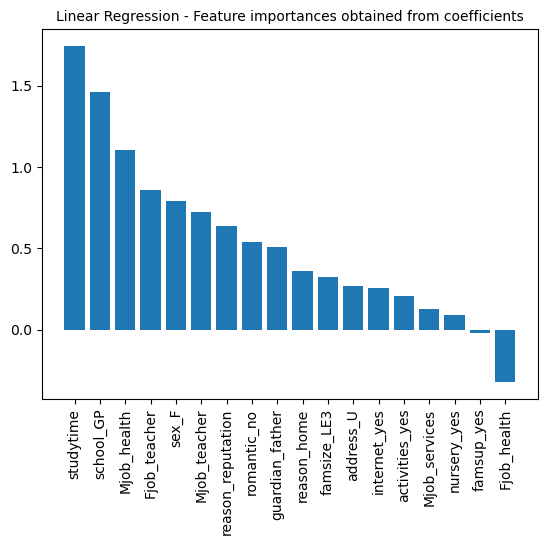

In [36]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Linear Regression - Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [20]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

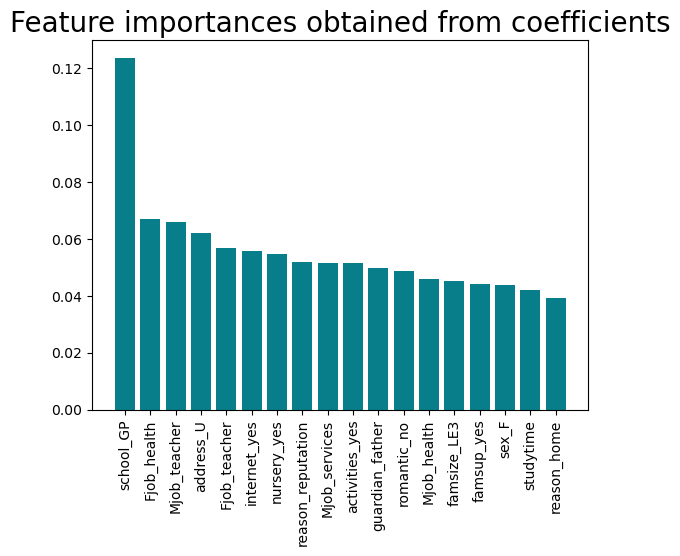

In [21]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

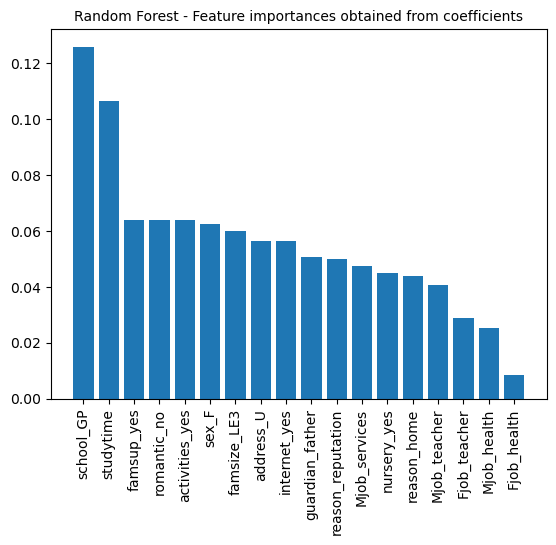

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Random Forest - Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

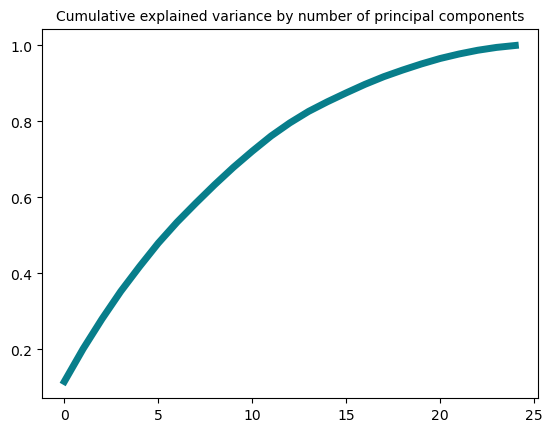

In [15]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=5, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=10)
plt.show()

In [16]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
Medu,-0.155448,0.005699,-0.021412,0.001667,0.008408,-0.030635,0.008385,-0.069380,-0.058635,-0.052956,...,-0.017960,-0.004484,0.062133,0.015058,-0.026292,-0.001604,-0.024163,-0.018283,-0.079873,0.078427
Fedu,-0.123246,-0.008832,-0.029602,-0.019979,-0.016631,-0.031585,0.018695,-0.068804,-0.026520,-0.043649,...,-0.010369,0.004341,0.062037,0.017898,-0.027025,0.015960,0.085766,-0.081043,0.019620,-0.066868
studytime,-0.059170,-0.072069,-0.061991,0.004384,0.019439,0.022791,-0.021992,-0.010823,0.019299,0.015461,...,-0.010298,-0.013722,-0.058855,0.221351,-0.007779,-0.017276,0.013695,0.025172,-0.009975,-0.007157
famrel,-0.020620,0.021055,-0.016033,-0.017239,-0.010267,-0.013572,0.007495,0.007358,-0.009635,-0.017071,...,0.006406,-0.016109,-0.052629,-0.036249,-0.218220,-0.046708,0.018073,0.022373,-0.004380,-0.003720
school_GP,-0.358087,-0.053071,0.071162,0.042603,-0.034541,0.142909,-0.004966,-0.054998,-0.058242,0.108301,...,-0.023611,-0.053852,0.005322,-0.015091,0.005141,0.012975,-0.008281,-0.002188,0.000691,0.000670
